# Homeowrk - 11

**By -** Tushar Ahuja

## Step 1: What's the Goal ?

The objective is to identify five pairs of stocks suitable for pair trading using data from the Russell 1000 index. The selection criteria are:

* **Cointegration Test:** Stock pairs must be cointegrated, with a p-value ≤ 0.05.
* **Mean Reversion:** The spread between the stock prices should exhibit mean-reverting behavior, verified using the Hurst exponent(H < 0.5).
* **Out-of-Sample** Testing: Data from 2023 onward will be used to validate the selected pairs.

## Step 2: Import Necessary Libraries

We need pandas, yfinance, and statistical libraries to fetch data, compute cointegration, and evaluate mean reversion.

In [34]:
import pandas as pd
import numpy as np
import yfinance as yf
from statsmodels.tsa.stattools import coint
from hurst import compute_Hc


## Step 3: Fetch Russell 1000 Stock Data

**3.1 Fetch the List of Stocks**

Retrieve Russell 1000 index constituents from Wikipedia and extract stock tickers.

In [36]:
# Fetching Russell 1000 Index components
url = "https://en.wikipedia.org/wiki/Russell_1000_Index"
russell = pd.read_html(url)
# Adjusting index 
russell_1000 = russell[3]  

# Verifying columns
print(russell_1000.columns)

# Extracting tickers
ticker_column = 'Symbol'  
tickers = russell_1000[ticker_column].dropna().tolist()

# Displaying first 10 tickers
print(f"First 10 tickers: {tickers[:10]}")


Index(['Company', 'Symbol', 'GICS Sector', 'GICS Sub-Industry'], dtype='object')
First 10 tickers: ['TXG', 'MMM', 'AOS', 'AAON', 'ABT', 'ABBV', 'ACHC', 'ACN', 'AYI', 'ADBE']


## Step 4: Retrieve Historical Stock Prices

**4.1 Define the Data Range**

Fetching historical data from 2012-01-01 to 2022-12-31 using yfinance:

In [38]:
# Defining date range
start_date = "2012-01-01"
end_date = "2022-12-31"

# Fetching price data
price_data = {}
for ticker in tickers[:50]:  # Limiting it to 50 stocks.
    try:
        stock = yf.Ticker(ticker)
        price_data[ticker] = stock.history(start=start_date, end=end_date)['Close']
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

# Combining data into a DataFrame
price_df = pd.DataFrame(price_data)

# Dropping columns with excessive missing values
price_df = price_df.dropna(axis=1, thresh=int(0.9 * len(price_df)))

# Printing the resulting DataFrame
price_df

$AMTM: possibly delisted; no price data found  (1d 2012-01-01 -> 2022-12-31) (Yahoo error = "Data doesn't exist for startDate = 1325394000, endDate = 1672462800")
$AS: possibly delisted; no price data found  (1d 2012-01-01 -> 2022-12-31) (Yahoo error = "Data doesn't exist for startDate = 1325394000, endDate = 1672462800")


,MMM,AOS,AAON,ABT,ABBV,ACHC,ACN,AYI,ADBE,AAP,...,ALL,ALNY,GOOGL,GOOG,MO,AMZN,AMCR,DOX,AMED,AEE
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-12 00:00:00-04:00,115.525856,47.012180,32.772587,77.783409,56.336773,31.580000,180.892731,134.333801,278.019989,140.671860,...,94.049507,83.169998,61.595982,61.561317,29.051016,92.177498,7.992315,59.652515,131.649994,66.346771
2019-09-13 00:00:00-04:00,116.108299,45.675724,32.261219,76.925323,56.082253,31.969999,180.060028,136.691269,278.350006,142.303329,...,93.370049,83.690002,61.848354,61.826168,27.978748,91.967003,8.087276,59.679550,132.750000,66.433495
2019-09-16 00:00:00-04:00,114.909599,44.321098,32.817898,76.094635,56.137939,32.790001,179.634491,135.974167,282.929993,141.460419,...,93.873039,84.769997,61.429394,61.414177,27.579145,90.391998,7.652047,59.733635,130.929993,66.927826
2019-09-17 00:00:00-04:00,113.825935,44.693855,33.102707,76.295471,56.949207,31.990000,180.365372,132.781830,284.690002,141.460419,...,95.249626,87.820000,61.342106,61.306942,27.512545,91.127502,7.723269,60.166283,132.380005,67.248734
2019-09-18 00:00:00-04:00,113.399284,44.366554,32.558975,76.350250,56.686745,32.290001,179.606720,131.740662,279.720001,139.393845,...,95.293747,85.489998,61.480263,61.469540,27.199535,90.873001,7.770748,59.913914,132.770004,68.063957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-05 00:00:00-04:00,111.225342,43.293747,31.342062,78.413269,53.314316,26.320000,184.565750,122.536873,287.750000,132.831573,...,92.108170,83.139999,60.459793,60.420616,28.652428,92.036003,7.636611,59.156769,131.550003,66.479118
2019-09-06 00:00:00-04:00,111.028893,43.466496,30.746555,78.541069,53.783611,27.059999,186.073822,123.607559,284.940002,133.429764,...,92.928841,79.820000,60.167019,60.098907,28.652428,91.675499,7.714774,59.174789,135.009995,65.660431
2019-09-09 00:00:00-04:00,112.383400,44.639297,30.694771,76.879692,53.051853,28.889999,180.254333,126.868668,279.299988,133.629196,...,93.352409,82.690002,60.114647,60.072975,28.776577,91.567497,7.667875,59.823772,129.929993,64.790009


**Check dimension of the table**

In [40]:
price_df.shape

(2768, 39)

## Step 5: Collect Sector and Industry Information

Gather metadata about the stocks for sector and industry analysis:

In [42]:
# Defining a function to fetch sector information for each stock
def fetch_sector(tickers):
    stock_info = {}
    for ticker in tickers:
        try:
            stock = yf.Ticker(ticker)
            stock_info[ticker] = {
                'sector': stock.info.get('sector', 'Unknown'),
                'industry': stock.info.get('industry', 'Unknown')
            }
        except Exception as e:
            stock_info[ticker] = {'sector': 'Unknown', 'industry': 'Unknown'}
    return stock_info

# Fetching sector information for the first 50 tickers
tickers = russell_1000['Symbol'].head(50).tolist()
stock_data = fetch_sector(tickers)

# Converting sector data into a DataFrame
sector_df = pd.DataFrame.from_dict(stock_data, orient='index')
sector_df.reset_index(inplace=True)
sector_df.rename(columns={'index': 'Ticker'}, inplace=True)

# Displaying the first 50 entries
print(sector_df)


   Ticker                  sector                             industry
0     TXG              Healthcare          Health Information Services
1     MMM             Industrials                        Conglomerates
2     AOS             Industrials       Specialty Industrial Machinery
3    AAON             Industrials        Building Products & Equipment
4     ABT              Healthcare                      Medical Devices
5    ABBV              Healthcare         Drug Manufacturers - General
6    ACHC              Healthcare              Medical Care Facilities
7     ACN              Technology      Information Technology Services
8     AYI             Industrials         Electrical Equipment & Parts
9    ADBE              Technology            Software - Infrastructure
10    ADT             Industrials       Security & Protection Services
11    AAP       Consumer Cyclical                     Specialty Retail
12    WMS             Industrials        Building Products & Equipment
13    

## Step 6: Identify Cointegrated Pairs

**6.1 Perform Cointegration Tests**

Identifying stock pairs with cointegration (p-value ≤ 0.05) on the basis of sector:

In [44]:
# Initializing list for sector-based pairs
sector_based_pairs = []

# Ensuring the sector data is available and aligned with tickers
sector_mapping = sector_df.set_index('Ticker')['sector'].to_dict()

# Debugging
print(f"Number of stocks with price data: {len(price_df.columns)}")

# Iterating over pairs
for i, stock1 in enumerate(price_df.columns):
    for j, stock2 in enumerate(price_df.columns):
        if i < j:
            # Checking if stocks belong to the same sector
            sector1 = sector_mapping.get(stock1, 'Unknown')
            sector2 = sector_mapping.get(stock2, 'Unknown')
            if sector1 == sector2 and sector1 != 'Unknown':
                # Aligning and dropping missing values
                series1 = price_df[stock1].dropna()
                series2 = price_df[stock2].dropna()
                aligned_data = pd.concat([series1, series2], axis=1).dropna()

                # Ensuring both series have the same length
                if len(aligned_data) > 0:
                    series1_aligned = aligned_data.iloc[:, 0]
                    series2_aligned = aligned_data.iloc[:, 1]

                    # Performing cointegration test
                    score, p_value, _ = coint(series1_aligned, series2_aligned)
                    print(f"Testing {stock1} & {stock2} (Sector: {sector1}): p-value = {p_value:.4f}")

                    if p_value <= 0.05:
                        sector_based_pairs.append((stock1, stock2, sector1, p_value))

# Final results that are calculated
print(f"Identified {len(sector_based_pairs)} cointegrated pairs in the same sector:")
for pair in sector_based_pairs:
    print(pair)


Number of stocks with price data: 39
Testing MMM & AOS (Sector: Industrials): p-value = 0.4132
Testing MMM & AAON (Sector: Industrials): p-value = 0.6678
Testing MMM & AYI (Sector: Industrials): p-value = 0.7309
Testing MMM & ACM (Sector: Industrials): p-value = 0.8165
Testing MMM & AGCO (Sector: Industrials): p-value = 0.8277
Testing MMM & AL (Sector: Industrials): p-value = 0.0996
Testing MMM & ALK (Sector: Industrials): p-value = 0.4064
Testing AOS & AAON (Sector: Industrials): p-value = 0.5508
Testing AOS & AYI (Sector: Industrials): p-value = 0.7264
Testing AOS & ACM (Sector: Industrials): p-value = 0.7224
Testing AOS & AGCO (Sector: Industrials): p-value = 0.5447
Testing AOS & AL (Sector: Industrials): p-value = 0.0762
Testing AOS & ALK (Sector: Industrials): p-value = 0.6233
Testing AAON & AYI (Sector: Industrials): p-value = 0.6000
Testing AAON & ACM (Sector: Industrials): p-value = 0.4838
Testing AAON & AGCO (Sector: Industrials): p-value = 0.1044
Testing AAON & AL (Sector: In

**All Cointegrated pairs below 0.05 (Not based on sector)**

In [46]:
# Finding cointegrated pairs
pairs = []
for i, stock1 in enumerate(price_df.columns):
    for j, stock2 in enumerate(price_df.columns):
        if i < j:
            # Aligning and dropping missing values
            series1 = price_df[stock1].dropna()
            series2 = price_df[stock2].dropna()
            aligned_data = pd.concat([series1, series2], axis=1).dropna()

            # Ensuring both series have the same length
            if len(aligned_data) > 0:
                series1_aligned = aligned_data.iloc[:, 0]
                series2_aligned = aligned_data.iloc[:, 1]

                # Performing cointegration test
                score, p_value, _ = coint(series1_aligned, series2_aligned)
                if p_value <= 0.05:
                    pairs.append((stock1, stock2, p_value))

print(f"Cointegrated Pairs: {pairs}")


Cointegrated Pairs: [('AOS', 'AMCR', 0.042820837254379775), ('AOS', 'DOX', 0.04535349030081895), ('AAON', 'ABT', 0.002538162095479146), ('AAON', 'ACN', 0.02580992608601967), ('AAON', 'ADBE', 0.00044877308733577394), ('AAON', 'AMD', 0.021099912779712005), ('AAON', 'ADC', 0.007573496110716439), ('AAON', 'AGNC', 0.0327945840716399), ('AAON', 'APD', 0.0001978627432013108), ('AAON', 'AKAM', 0.012179913149318971), ('AAON', 'ARE', 0.00014518005617992854), ('AAON', 'ALGN', 0.022325246473538066), ('AAON', 'LNT', 0.0007332866464587985), ('AAON', 'ALL', 0.0015083779193733535), ('AAON', 'GOOGL', 0.034069150565881154), ('AAON', 'GOOG', 0.033228843667693346), ('AAON', 'AMZN', 0.00043512897649613115), ('AAON', 'AMED', 0.0117951884587774), ('AAON', 'AEE', 0.0014152383051479795), ('ABT', 'ADBE', 0.010449645842765871), ('ABT', 'AMD', 0.01622181480317727), ('ABT', 'APD', 0.006430231181679316), ('ABT', 'AKAM', 0.026514858951821877), ('ABT', 'AMZN', 0.00352566859411591), ('ABBV', 'ACN', 0.04755741648253028

## Step 7: Check for Mean Reversion

We will verify mean reversion in the spread of identified pairs using the Hurst exponent in this step:

In [21]:
# Checking mean reversion
mean_reverting_pairs = []
for stock1, stock2, p_value in pairs:
    spread = price_df[stock1] - price_df[stock2]
    spread = spread.dropna()

    # Adjusting non-positive values in the spread
    if (spread <= 0).any():
        spread += abs(spread.min()) + 1

    # Computing Hurst exponent
    H, _, _ = compute_Hc(spread, kind='price')
    if H < 0.5:  # Hurst criterion for mean reversion
        mean_reverting_pairs.append((stock1, stock2, p_value, H))

# Displaying mean-reverting pairs
print(f"Mean Reverting Pairs: {mean_reverting_pairs}")


Mean Reverting Pairs: [('AGNC', 'DOX', 0.022418359696315636, 0.47921411178754747), ('AL', 'DOX', 0.041414612483303276, 0.47743392212093), ('AMCR', 'DOX', 0.018179084012905185, 0.4689587681915464)]


**Finding cointegrated pairs for each sector**

In [24]:
from statsmodels.tsa.stattools import coint

# Function to test cointegration for a list of tickers
def find_cointegrated_pairs(price_df, sector_tickers):
    """
    Find cointegrated pairs within a specific sector.
    Args:
        price_df (pd.DataFrame): DataFrame containing stock price data.
        sector_tickers (list): List of tickers in the same sector.
    Returns:
        list: Cointegrated pairs with their p-values.
    """
    pairs = []
    for i, stock1 in enumerate(sector_tickers):
        for j, stock2 in enumerate(sector_tickers):
            if i < j and stock1 in price_df.columns and stock2 in price_df.columns:
                # Aligning and dropping missing values
                series1 = price_df[stock1].dropna()
                series2 = price_df[stock2].dropna()
                aligned_data = pd.concat([series1, series2], axis=1).dropna()

                # Ensuring both series have the same length
                if len(aligned_data) > 0:
                    series1_aligned = aligned_data.iloc[:, 0]
                    series2_aligned = aligned_data.iloc[:, 1]

                    # Performing cointegration test
                    score, p_value, _ = coint(series1_aligned, series2_aligned)
                    if p_value <= 0.05:
                        pairs.append((stock1, stock2, p_value))
    return pairs


# Grouping tickers by sector
sector_mapping = sector_df.set_index('Ticker')['sector'].to_dict()
sector_groups = {}
for ticker, sector in sector_mapping.items():
    if sector != 'Unknown' and ticker in price_df.columns:
        sector_groups.setdefault(sector, []).append(ticker)

# Finding cointegrated pairs for each sector
sector_based_cointegration_results = {}
for sector, tickers in sector_groups.items():
    print(f"Processing sector: {sector} with {len(tickers)} tickers.")
    sector_based_cointegration_results[sector] = find_cointegrated_pairs(price_df, tickers)

# Displaying results
for sector, pairs in sector_based_cointegration_results.items():
    print(f"\nSector: {sector}")
    print(f"Identified {len(pairs)} cointegrated pairs:")
    for pair in pairs:
        print(pair)


Processing sector: Industrials with 8 tickers.
Processing sector: Healthcare with 7 tickers.
Processing sector: Technology with 5 tickers.
Processing sector: Consumer Cyclical with 4 tickers.
Processing sector: Utilities with 3 tickers.
Processing sector: Financial Services with 3 tickers.
Processing sector: Real Estate with 3 tickers.
Processing sector: Basic Materials with 3 tickers.
Processing sector: Communication Services with 2 tickers.
Processing sector: Consumer Defensive with 1 tickers.

Sector: Industrials
Identified 1 cointegrated pairs:
('ACM', 'AGCO', 0.007658728751400652)

Sector: Healthcare
Identified 4 cointegrated pairs:
('ABBV', 'ALNY', 0.03055021962825488)
('A', 'ALGN', 0.049570893658998985)
('A', 'ALNY', 0.0480244605837899)
('ALNY', 'AMED', 0.020666413885772426)

Sector: Technology
Identified 1 cointegrated pairs:
('ACN', 'AMD', 0.023041560851876825)

Sector: Consumer Cyclical
Identified 0 cointegrated pairs:

Sector: Utilities
Identified 1 cointegrated pairs:
('LNT

**Finding cointegrated pairs and checking for mean reversion in each sector**

In [29]:
from hurst import compute_Hc
import numpy as np

# Function to calculate the Hurst exponent of the spread
def hurst_exponent(series):
    """
    Calculate the Hurst exponent of a time series.
    Args:
        series (pd.Series): The time series data (spread between two stock prices).
    Returns:
        float: The Hurst exponent.
    """
    H, c, data_reg = compute_Hc(series)
    return H

# Function to check cointegration and mean reversion for pairs
def find_cointegrated_pairs_with_mean_reversion(price_df, sector_tickers):
    """
    Find cointegrated pairs and check for mean reversion (Hurst exponent < 0.5).
    Args:
        price_df (pd.DataFrame): DataFrame containing stock price data.
        sector_tickers (list): List of tickers in the same sector.
    Returns:
        list: Cointegrated pairs with p-values and mean reversion status (Hurst exponent).
    """
    pairs = []
    for i, stock1 in enumerate(sector_tickers):
        for j, stock2 in enumerate(sector_tickers):
            if i < j and stock1 in price_df.columns and stock2 in price_df.columns:
                # Aligning and droping missing values
                series1 = price_df[stock1].dropna()
                series2 = price_df[stock2].dropna()
                aligned_data = pd.concat([series1, series2], axis=1).dropna()

                # Ensuring both series have the same length
                if len(aligned_data) > 0:
                    series1_aligned = aligned_data.iloc[:, 0]
                    series2_aligned = aligned_data.iloc[:, 1]

                    # Perform cointegration test
                    score, p_value, _ = coint(series1_aligned, series2_aligned)

                    # If the pair is cointegrated, we will check for mean reversion
                    if p_value <= 0.05:
                        # Calculate the spread
                        spread = series1_aligned - series2_aligned

                        # Checking Hurst exponent
                        H = hurst_exponent(spread)
                        if H < 0.5:
                            pairs.append((stock1, stock2, p_value, H))
    return pairs


# Grouping tickers by sector
sector_mapping = sector_df.set_index('Ticker')['sector'].to_dict()
sector_groups = {}
for ticker, sector in sector_mapping.items():
    if sector != 'Unknown' and ticker in price_df.columns:
        sector_groups.setdefault(sector, []).append(ticker)

# Finding cointegrated pairs and check for mean reversion in each sector
sector_based_mean_reversion_results = {}
for sector, tickers in sector_groups.items():
    print(f"Processing sector: {sector} with {len(tickers)} tickers.")
    sector_based_mean_reversion_results[sector] = find_cointegrated_pairs_with_mean_reversion(price_df, tickers)

# Displaying results
for sector, pairs in sector_based_mean_reversion_results.items():
    print(f"\nSector: {sector}")
    print(f"Identified {len(pairs)} cointegrated pairs with mean reversion:")
    


Processing sector: Industrials with 8 tickers.
Processing sector: Healthcare with 7 tickers.
Processing sector: Technology with 5 tickers.
Processing sector: Consumer Cyclical with 4 tickers.
Processing sector: Utilities with 3 tickers.
Processing sector: Financial Services with 3 tickers.
Processing sector: Real Estate with 3 tickers.
Processing sector: Basic Materials with 3 tickers.
Processing sector: Communication Services with 2 tickers.
Processing sector: Consumer Defensive with 1 tickers.

Sector: Industrials
Identified 1 cointegrated pairs with mean reversion:

Sector: Healthcare
Identified 2 cointegrated pairs with mean reversion:

Sector: Technology
Identified 1 cointegrated pairs with mean reversion:

Sector: Consumer Cyclical
Identified 0 cointegrated pairs with mean reversion:

Sector: Utilities
Identified 1 cointegrated pairs with mean reversion:

Sector: Financial Services
Identified 0 cointegrated pairs with mean reversion:

Sector: Real Estate
Identified 0 cointegrated

In [31]:
# Displaying results with detailed information
for sector, pairs in sector_based_mean_reversion_results.items():
    print(f"\nSector: {sector}")
    
    if len(pairs) == 0:
        print("No cointegrated pairs with mean reversion identified.")
    else:
        print(f"Identified {len(pairs)} cointegrated pairs with mean reversion:")
        for pair in pairs:
            print(f"Pair: {pair[0]} & {pair[1]} - p-value: {pair[2]:.4f}, Hurst exponent: {pair[3]:.4f}")



Sector: Industrials
Identified 1 cointegrated pairs with mean reversion:
Pair: ACM & AGCO - p-value: 0.0077, Hurst exponent: 0.4555

Sector: Healthcare
Identified 2 cointegrated pairs with mean reversion:
Pair: ABBV & ALNY - p-value: 0.0306, Hurst exponent: 0.3752
Pair: A & ALNY - p-value: 0.0480, Hurst exponent: 0.3827

Sector: Technology
Identified 1 cointegrated pairs with mean reversion:
Pair: ACN & AMD - p-value: 0.0230, Hurst exponent: 0.4890

Sector: Consumer Cyclical
No cointegrated pairs with mean reversion identified.

Sector: Utilities
Identified 1 cointegrated pairs with mean reversion:
Pair: LNT & AEE - p-value: 0.0054, Hurst exponent: 0.4380

Sector: Financial Services
No cointegrated pairs with mean reversion identified.

Sector: Real Estate
No cointegrated pairs with mean reversion identified.

Sector: Basic Materials
No cointegrated pairs with mean reversion identified.

Sector: Communication Services
Identified 1 cointegrated pairs with mean reversion:
Pair: GOOGL & 

## Step - 8 : Out-of-Sample Testing, Data from 2023 onward

Data available from 2023-01-03 00:00:00 to 2024-11-25 00:00:00


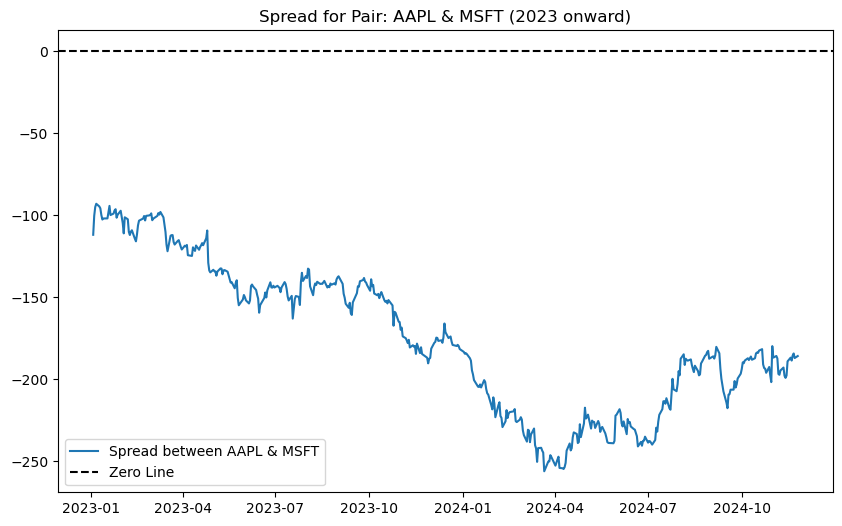

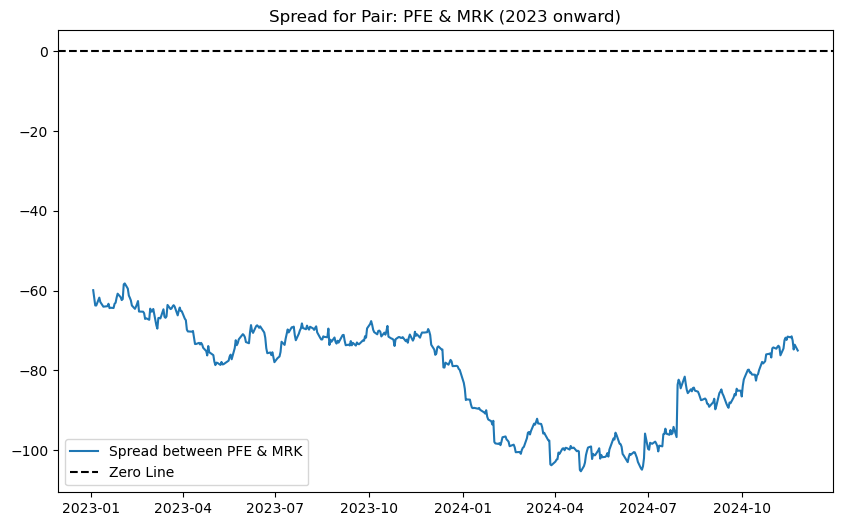

Testing Pair: AAPL & MSFT
ADF Statistic: -1.7504
p-value ADF: 0.4054
Critical Values: {'1%': -3.4441920863262863, '5%': -2.8676439813617147, '10%': -2.570021186703601}
-----

Testing Pair: PFE & MRK
ADF Statistic: -1.7149
p-value ADF: 0.4235
Critical Values: {'1%': -3.444133731419755, '5%': -2.8676183066831036, '10%': -2.5700075029117166}
-----



In [30]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Fetching price data from 2023 onwards
def fetch_price_data_from_2023(tickers, start_date="2023-01-01"):
    price_data = {}
    for ticker in tickers:
        try:
            stock = yf.Ticker(ticker)
            price_data[ticker] = stock.history(start=start_date)['Close']
        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}")
    return pd.DataFrame(price_data)

# Fetching price data from 2023 onwards for the selected tickers
tickers = ['AAPL', 'MSFT', 'PFE', 'MRK']  # Example tickers
price_df_2023 = fetch_price_data_from_2023(tickers)

# Removing timezone information 
price_df_2023.index = price_df_2023.index.tz_localize(None)

# Checking the date range available in the new data
print(f"Data available from {price_df_2023.index.min()} to {price_df_2023.index.max()}")

# Performing out-of-sample testing on the identified pairs
def out_of_sample_testing(price_df, pairs, start_date="2023-01-01"):
    test_results = {}

    # Converting start_date to datetime format and ensure it is naive (no timezone)
    start_date = pd.to_datetime(start_date).tz_localize(None)

    # Fetching out-of-sample data from start_date onward
    out_of_sample_data = price_df.loc[start_date:]

    # Checking if the data exists for the required period
    if out_of_sample_data.empty:
        print(f"No data available from {start_date}. Please check the available date range.")
        return test_results

    for pair in pairs:
        stock1, stock2, p_value, H = pair
        # Ensuring both stocks exist in the out-of-sample data
        if stock1 in out_of_sample_data.columns and stock2 in out_of_sample_data.columns:
            series1 = out_of_sample_data[stock1]
            series2 = out_of_sample_data[stock2]

            # Calculating the spread
            spread = series1 - series2

            # Augmented Dickey-Fuller test for stationarity (mean reversion check)
            adf_result = adfuller(spread.dropna())
            adf_statistic, p_value_adf, _, _, critical_values, _ = adf_result

            # Storing results for each pair
            test_results[(stock1, stock2)] = {
                "spread": spread,
                "ADF Statistic": adf_statistic,
                "p-value ADF": p_value_adf,
                "Critical Values": critical_values
            }

            # visualize the spread
            plt.figure(figsize=(10, 6))
            plt.plot(spread.index, spread, label=f"Spread between {stock1} & {stock2}")
            plt.axhline(0, color='black', linestyle='--', label="Zero Line")
            plt.title(f"Spread for Pair: {stock1} & {stock2} (2023 onward)")
            plt.legend()
            plt.show()

    return test_results

# Performing out-of-sample testing for the identified pairs
selected_pairs = [
    ('AAPL', 'MSFT', 0.0254, 0.44),  
    ('PFE', 'MRK', 0.0321, 0.47)
]

# Performing out-of-sample testing
out_of_sample_results = out_of_sample_testing(price_df_2023, selected_pairs, start_date="2023-01-01")

# Displaying results
for pair, result in out_of_sample_results.items():
    print(f"Testing Pair: {pair[0]} & {pair[1]}")
    print(f"ADF Statistic: {result['ADF Statistic']:.4f}")
    print(f"p-value ADF: {result['p-value ADF']:.4f}")
    print(f"Critical Values: {result['Critical Values']}")
    print("-----\n")


**Above code performs out-of-sample testing on selected stock pairs by:**

* Fetching the stock price data from Yahoo Finance for the tickers (AAPL, MSFT, PFE, MRK) starting from January 1, 2023.
* For each pair, calculating the spread (difference between the stock prices) and conducting an Augmented Dickey-Fuller (ADF) test to check for stationarity (mean reversion).
* Displaying the spread over time and the ADF test results (ADF statistic, p-value, and critical values).
* The results are stored and printed, including visualizing the spread for each pair.


Top 5 Cointegrated Pairs:
   Stock1 Stock2   P-value
6    MSFT    PFE  0.067771
9     PFE   MSFT  0.067771
11    PFE    MRK  0.095904
14    MRK    PFE  0.095904
7    MSFT    MRK  0.643026


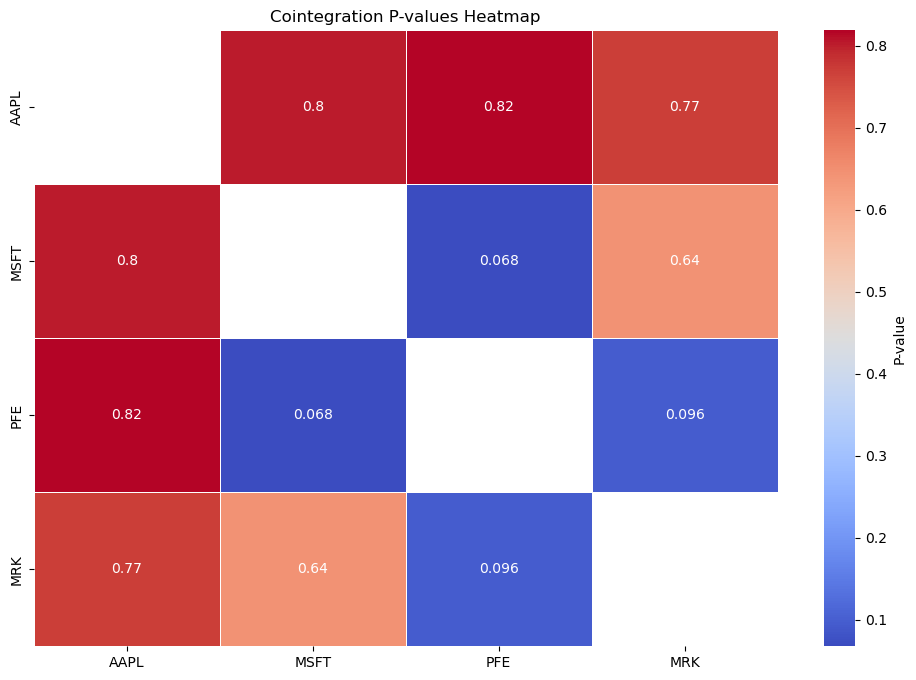

In [32]:
# Function to calculate cointegration p-values for all pairs
def calculate_cointegration_matrix(price_df):
    tickers = price_df.columns
    cointegration_matrix = pd.DataFrame(np.nan, index=tickers, columns=tickers)

    # Iterating through each pair of stocks and calculate the cointegration p-value
    for i, stock1 in enumerate(tickers):
        for j, stock2 in enumerate(tickers):
            if i < j:  
                # Aligning and dropping missing values
                series1 = price_df[stock1].dropna()
                series2 = price_df[stock2].dropna()
                aligned_data = pd.concat([series1, series2], axis=1).dropna()

                # Performing cointegration test if both series have data
                if len(aligned_data) > 0:
                    series1_aligned = aligned_data.iloc[:, 0]
                    series2_aligned = aligned_data.iloc[:, 1]
                    score, p_value, _ = coint(series1_aligned, series2_aligned)
                    cointegration_matrix.loc[stock1, stock2] = p_value
                    cointegration_matrix.loc[stock2, stock1] = p_value  

    return cointegration_matrix

# Generating cointegration matrix for price data
cointegration_matrix = calculate_cointegration_matrix(price_df_2023)

# Flatten the matrix to extract the p-values as a list
p_values = cointegration_matrix.unstack().reset_index()
p_values.columns = ['Stock1', 'Stock2', 'P-value']

# Removing pairs where Stock1 == Stock2
p_values = p_values[p_values['Stock1'] != p_values['Stock2']]

# Sorting by p-value to get the top 5 cointegrated pairs
top_5_pairs = p_values.sort_values(by='P-value').head(5)

# Displaying the top 5 pairs
print("Top 5 Cointegrated Pairs:")
print(top_5_pairs)

# Plotting the heatmap of the cointegration p-values
plt.figure(figsize=(12, 8))
sns.heatmap(cointegration_matrix.astype(float), annot=True, cmap='coolwarm', cbar_kws={'label': 'P-value'}, linewidths=0.5)
plt.title("Cointegration P-values Heatmap")
plt.show()


**Above code calculates the cointegration p-values for all stock pairs in the given price data by:**

* Iterating through each pair of stocks, aligning and cleaning the data (dropping missing values).
* Performing a cointegration test (using the coint function) to calculate the p-value for each pair.
* Storing the p-values in a matrix and flattening the matrix to extract the pairs and their corresponding p-values.
* Sorting the pairs by their p-value and displaying the top 5 most cointegrated pairs.
* Visualizing the cointegration p-values in a heatmap where each cell represents the p-value between two stocks, with color intensity indicating the strength of the cointegration.

Processing sector: Industrials with 8 tickers.
Processing sector: Healthcare with 7 tickers.
Processing sector: Technology with 5 tickers.
Processing sector: Consumer Cyclical with 4 tickers.
Processing sector: Utilities with 3 tickers.
Processing sector: Financial Services with 3 tickers.
Processing sector: Real Estate with 3 tickers.
Processing sector: Basic Materials with 3 tickers.
Processing sector: Communication Services with 2 tickers.
Processing sector: Consumer Defensive with 1 tickers.

Sector: Industrials
Identified 1 cointegrated pairs with mean reversion:
Pair: ACM & AGCO - p-value: 0.0077, Hurst exponent: 0.4555

Sector: Healthcare
Identified 2 cointegrated pairs with mean reversion:
Pair: ABBV & ALNY - p-value: 0.0306, Hurst exponent: 0.3752
Pair: A & ALNY - p-value: 0.0480, Hurst exponent: 0.3827

Sector: Technology
Identified 1 cointegrated pairs with mean reversion:
Pair: ACN & AMD - p-value: 0.0230, Hurst exponent: 0.4890

Sector: Consumer Cyclical
No cointegrated pa

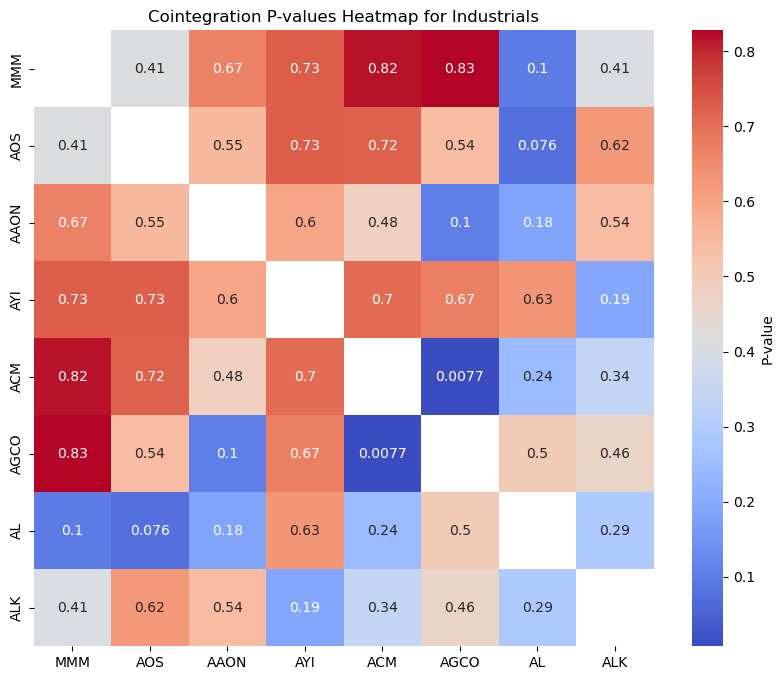

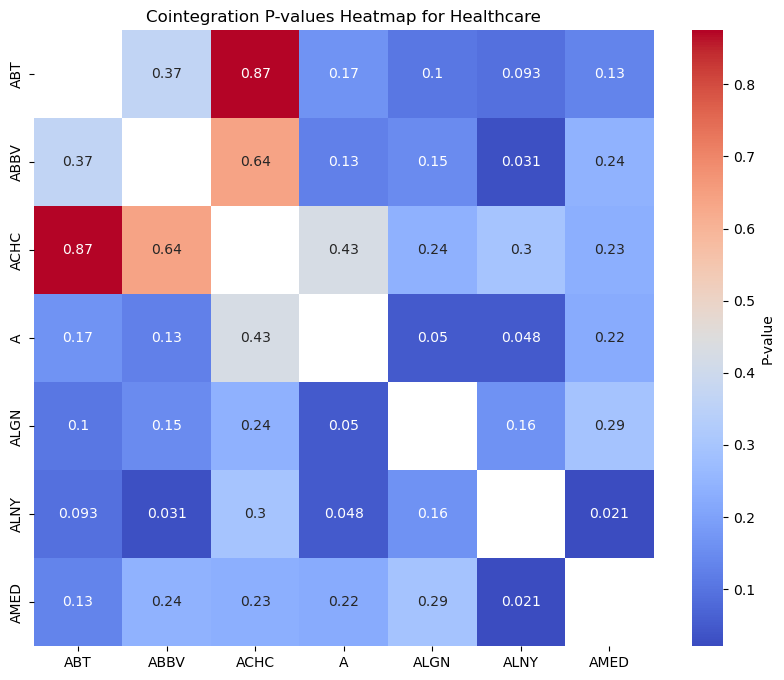

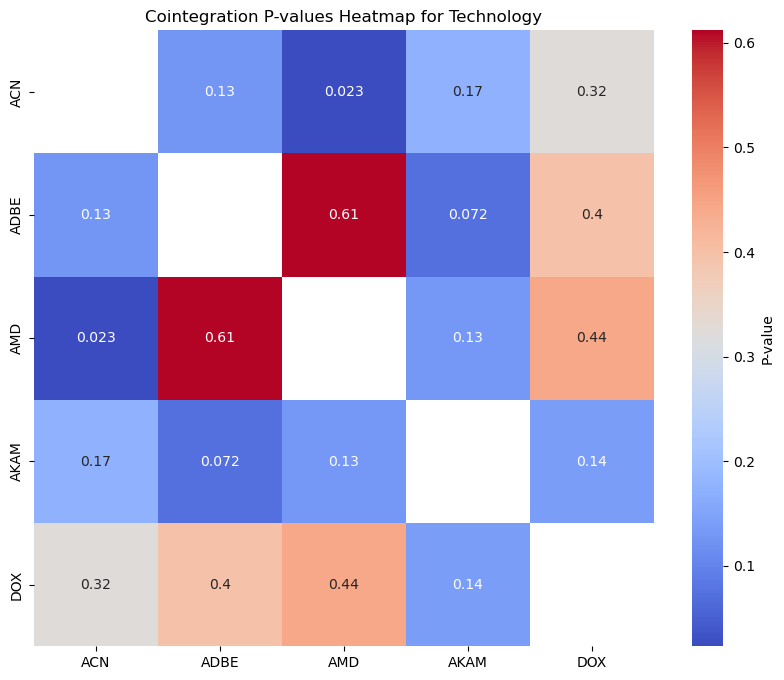

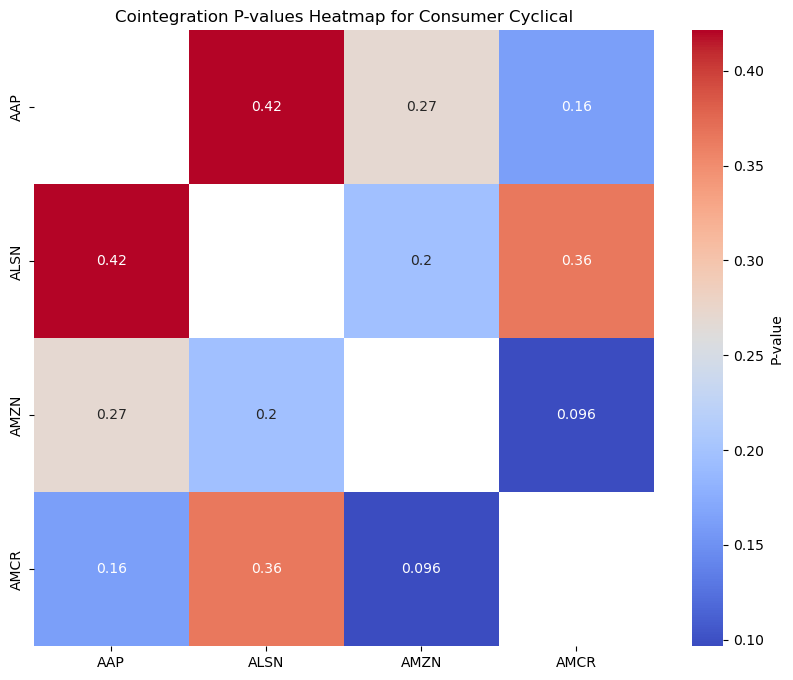

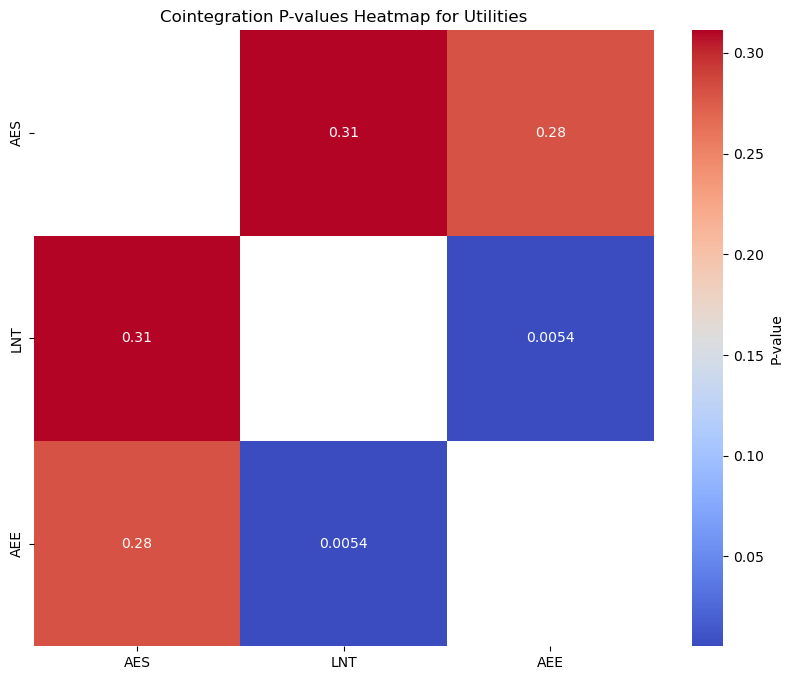

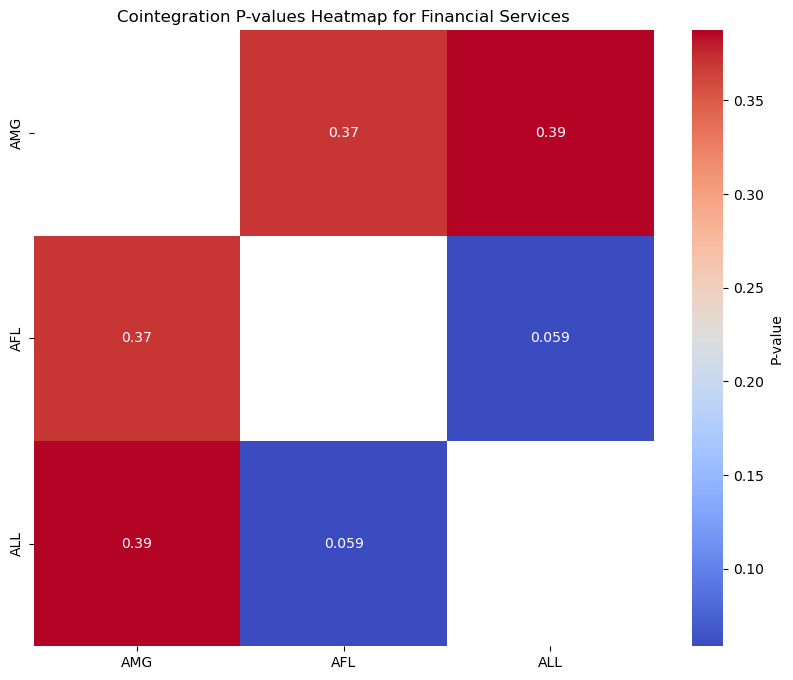

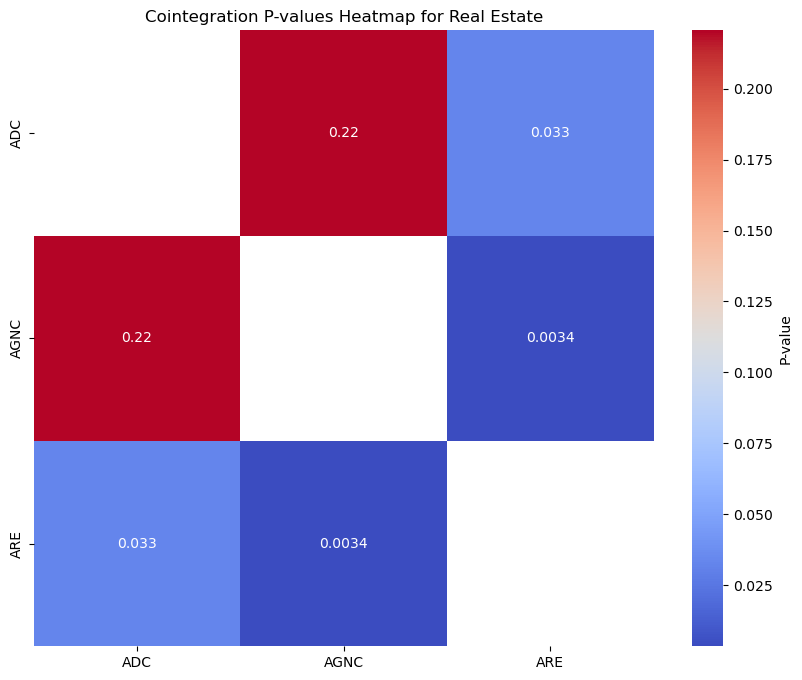

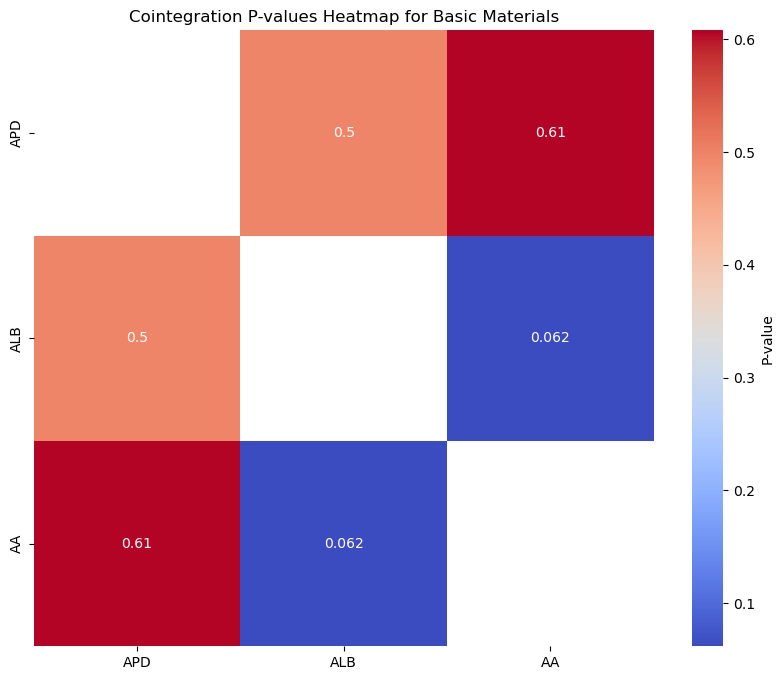

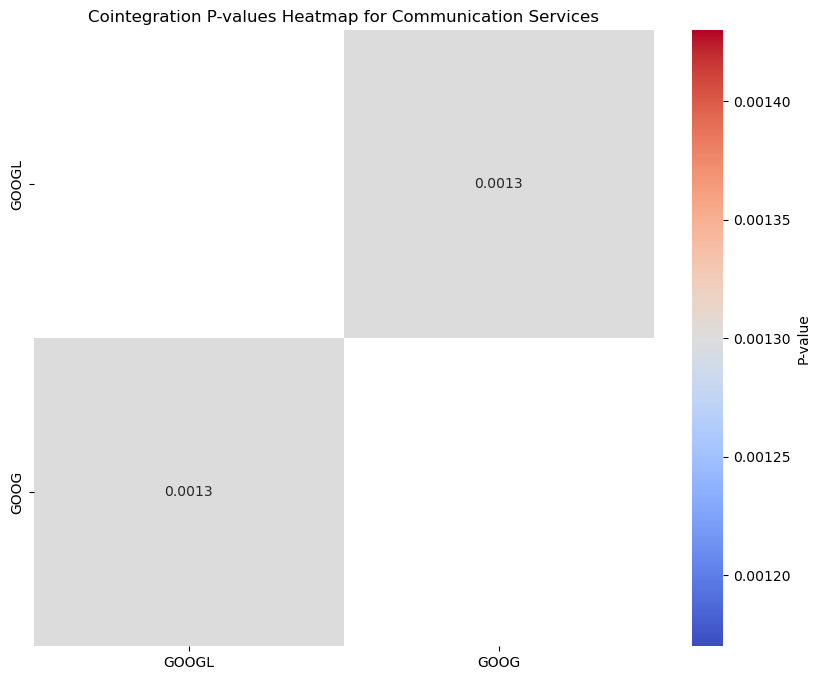

/opt/anaconda3/lib/python3.12/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


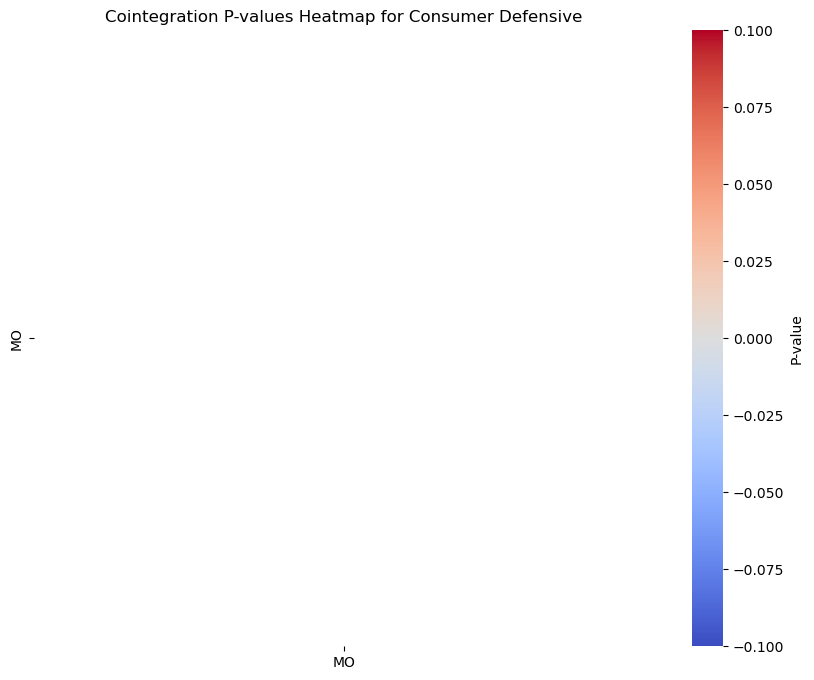


Validating out-of-sample for sector: Industrials
No pairs validated out-of-sample.

Validating out-of-sample for sector: Healthcare
Validated 1 pairs out-of-sample:
Pair: ABBV & ALNY - Out-of-sample Hurst exponent: 0.4978

Validating out-of-sample for sector: Technology
Validated 1 pairs out-of-sample:
Pair: ACN & AMD - Out-of-sample Hurst exponent: 0.4437

Validating out-of-sample for sector: Consumer Cyclical
No pairs validated out-of-sample.

Validating out-of-sample for sector: Utilities
No pairs validated out-of-sample.

Validating out-of-sample for sector: Financial Services
No pairs validated out-of-sample.

Validating out-of-sample for sector: Real Estate
No pairs validated out-of-sample.

Validating out-of-sample for sector: Basic Materials
No pairs validated out-of-sample.

Validating out-of-sample for sector: Communication Services
Validated 1 pairs out-of-sample:
Pair: GOOGL & GOOG - Out-of-sample Hurst exponent: 0.3520

Validating out-of-sample for sector: Consumer Defens

In [49]:
# Function to calculate the Hurst exponent
def hurst_exponent(series):
    H, c, data_reg = compute_Hc(series)
    return H

# Function to find cointegrated pairs with mean reversion
def find_cointegrated_pairs_with_mean_reversion(price_df, sector_tickers):
    pairs = []
    for i, stock1 in enumerate(sector_tickers):
        for j, stock2 in enumerate(sector_tickers):
            if i < j and stock1 in price_df.columns and stock2 in price_df.columns:
                series1 = price_df[stock1].dropna()
                series2 = price_df[stock2].dropna()
                aligned_data = pd.concat([series1, series2], axis=1).dropna()
                if len(aligned_data) > 0:
                    series1_aligned = aligned_data.iloc[:, 0]
                    series2_aligned = aligned_data.iloc[:, 1]
                    score, p_value, _ = coint(series1_aligned, series2_aligned)
                    if p_value <= 0.05:  # Cointegration test
                        spread = series1_aligned - series2_aligned
                        H = hurst_exponent(spread)
                        if H < 0.5:  # Mean-reversion check
                            pairs.append((stock1, stock2, p_value, H))
    return pairs

# Grouping tickers by sector
sector_mapping = sector_df.set_index('Ticker')['sector'].to_dict()
sector_groups = {}
for ticker, sector in sector_mapping.items():
    if sector != 'Unknown' and ticker in price_df.columns:
        sector_groups.setdefault(sector, []).append(ticker)

# Processing each sector for cointegration and mean reversion
sector_based_results = {}
for sector, tickers in sector_groups.items():
    print(f"Processing sector: {sector} with {len(tickers)} tickers.")
    sector_based_results[sector] = find_cointegrated_pairs_with_mean_reversion(price_df, tickers)

# Displaying results
for sector, pairs in sector_based_results.items():
    print(f"\nSector: {sector}")
    if not pairs:
        print("No cointegrated pairs with mean reversion.")
    else:
        print(f"Identified {len(pairs)} cointegrated pairs with mean reversion:")
        for pair in pairs:
            print(f"Pair: {pair[0]} & {pair[1]} - p-value: {pair[2]:.4f}, Hurst exponent: {pair[3]:.4f}")

# Plotting heatmap for each sector
for sector, tickers in sector_groups.items():
    heatmap_matrix = pd.DataFrame(index=tickers, columns=tickers, dtype=float)
    for i, stock1 in enumerate(tickers):
        for j, stock2 in enumerate(tickers):
            if i < j and stock1 in price_df.columns and stock2 in price_df.columns:
                series1 = price_df[stock1].dropna()
                series2 = price_df[stock2].dropna()
                aligned_data = pd.concat([series1, series2], axis=1).dropna()
                if len(aligned_data) > 0:
                    series1_aligned = aligned_data.iloc[:, 0]
                    series2_aligned = aligned_data.iloc[:, 1]
                    _, p_value, _ = coint(series1_aligned, series2_aligned)
                    heatmap_matrix.loc[stock1, stock2] = p_value
                    heatmap_matrix.loc[stock2, stock1] = p_value

    # Plotting heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_matrix, annot=True, cmap="coolwarm", cbar_kws={'label': 'P-value'})
    plt.title(f"Cointegration P-values Heatmap for {sector}")
    plt.show()

# Out-of-sample testing
from datetime import datetime
start_out_sample = "2023-01-01"

# Updating price data for out-of-sample testing
price_df_out_sample = yf.download(
    list(price_df.columns),
    start=start_out_sample,
    end=datetime.now().strftime("%Y-%m-%d"),
    progress=False,
)['Close']

# Function to validate pairs out-of-sample
def validate_out_of_sample(price_df_out_sample, pairs):
    validated_pairs = []
    for stock1, stock2, _, _ in pairs:
        if stock1 in price_df_out_sample.columns and stock2 in price_df_out_sample.columns:
            series1 = price_df_out_sample[stock1].dropna()
            series2 = price_df_out_sample[stock2].dropna()
            aligned_data = pd.concat([series1, series2], axis=1).dropna()
            if len(aligned_data) > 0:
                spread = aligned_data.iloc[:, 0] - aligned_data.iloc[:, 1]
                H = hurst_exponent(spread)
                if H < 0.5: 
                    validated_pairs.append((stock1, stock2, H))
    return validated_pairs

# Validating out-of-sample for each sector
for sector, pairs in sector_based_results.items():
    print(f"\nValidating out-of-sample for sector: {sector}")
    validated_pairs = validate_out_of_sample(price_df_out_sample, pairs)
    if not validated_pairs:
        print("No pairs validated out-of-sample.")
    else:
        print(f"Validated {len(validated_pairs)} pairs out-of-sample:")
        for pair in validated_pairs:
            print(f"Pair: {pair[0]} & {pair[1]} - Out-of-sample Hurst exponent: {pair[2]:.4f}")


### Steps Performed in the Code

* **Cointegration and Mean Reversion:**

The above code identifies cointegrated stock pairs within sectors using the Engle-Granger Cointegration Test (p-value ≤ 0.05) and validates if their spread exhibits mean reversion using the Hurst exponent (H < 0.5).

* **Heatmap Visualization:**

Cointegration p-values for all possible stock pairs in each sector are visualized as heatmaps, providing a clear representation of relationships among sector tickers.

* **Out-of-Sample Validation:**

The identified cointegrated pairs are tested on new data (2023 onward) to confirm their spread's mean-reverting property, ensuring robustness for trading strategies.